In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
import sys
sys.path.append('../')

from TSNE_code.TSNE_utils import TSNE
from sklearn.manifold import TSNE as sk_TSNE

# Comparison of Scikit-Learn and Custom t-SNE on MNIST data

In [3]:
path_to_mnist_dataset = "digits.npz"

In [4]:
mnist_loader = np.load(path_to_mnist_dataset)
mnist_matrices = np.concatenate((mnist_loader["x"], mnist_loader["xt"]), axis=0) / 255
mnist_labels = np.concatenate((mnist_loader["y"], mnist_loader["yt"]), axis=0)
#mnist_matrices = mnist_loader["xt"] / 255
#mnist_labels = mnist_loader["yt"]
mnist_loader.close()

In [5]:
def plot_digit(ax, digit_vector, title=None, color="red"):
    digit = digit_vector.reshape(28, 28)
    ax.imshow(digit, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None:
        ax.set_title(title, color="red" if color is None else color)

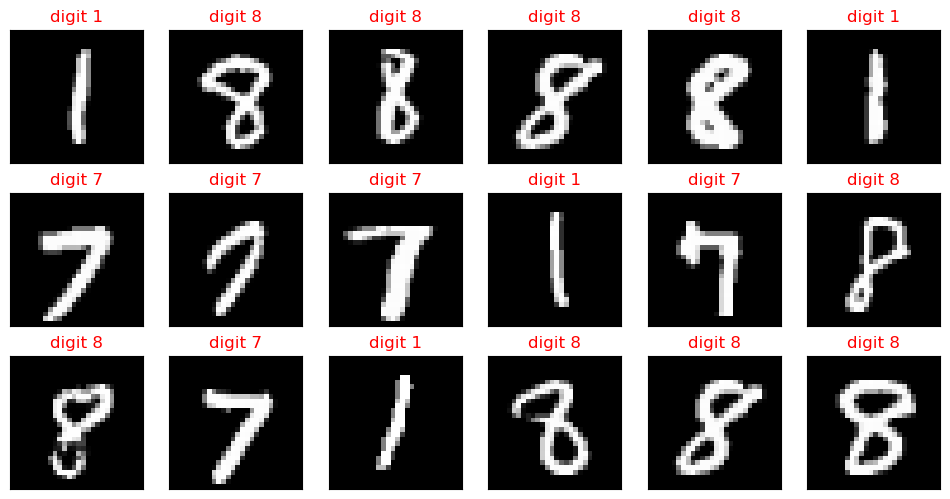

In [6]:
nrows, ncols = 3, 6
to_display = np.random.choice(range(len(mnist_matrices)), size=nrows*ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(2*ncols, 2*nrows))
cur_display = 0
for i in range(nrows):
    for j in range(ncols):
        digit_vector = mnist_matrices[to_display[cur_display]]
        plot_digit(axs[i][j], digit_vector, title=f"digit {mnist_labels[to_display[cur_display], 0]}")
        cur_display += 1

### Scikit-learn t-SNE on MNIST data

In [7]:
mnist_perplexity = 30

In [8]:
mnist_tsne = sk_TSNE(n_components=2, learning_rate='auto', perplexity=mnist_perplexity, init='random')
sk_embedding = mnist_tsne.fit_transform(mnist_matrices)

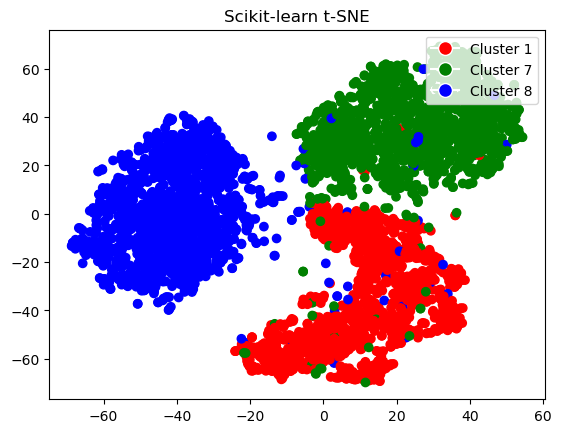

In [9]:
colors = {1: "red", 7: "green", 8: "blue"}
plt.scatter(sk_embedding[:, 0], sk_embedding[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='upper right')
plt.title("Scikit-learn t-SNE");

### Custom t-SNE on MNIST data

In [10]:
mnist_perplexity = 30

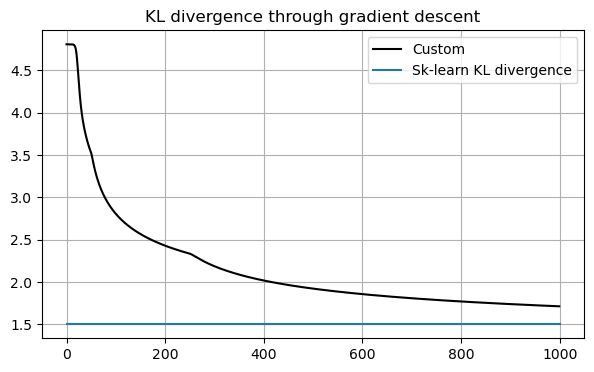

In [11]:
mnist_custom_tsne = TSNE(n_components=2, perplexity=mnist_perplexity, adaptive_learning_rate=False, patience=50, n_iter=1000)
custom_embedding = mnist_custom_tsne.fit_transform(mnist_matrices, reference_kl_divergence=mnist_tsne.kl_divergence_,
                                                   title='Sk-learn KL divergence', verbose=3)

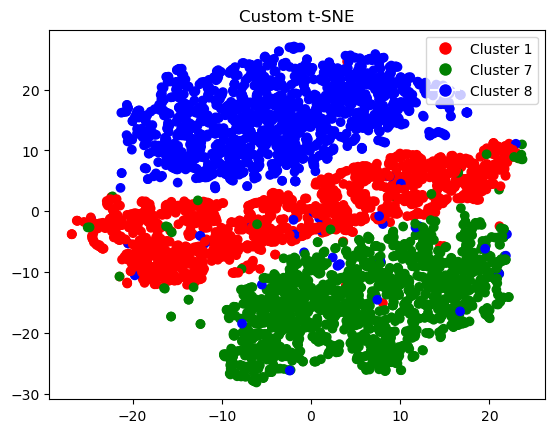

In [12]:
colors = {1: "red", 7: "green", 8: "blue"}
plt.scatter(custom_embedding[:, 0], custom_embedding[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='upper right')
plt.title("Custom t-SNE");

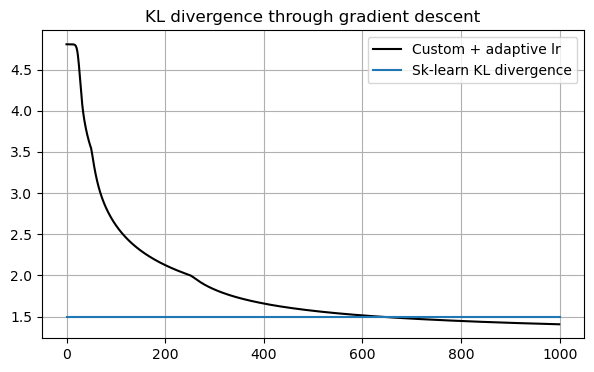

In [13]:
mnist_custom_tsne_ad = TSNE(n_components=2, perplexity=mnist_perplexity, adaptive_learning_rate=True, patience=50, n_iter=1000)
custom_embedding_ad = mnist_custom_tsne_ad.fit_transform(mnist_matrices, reference_kl_divergence=mnist_tsne.kl_divergence_,
                                                   title='Sk-learn KL divergence', verbose=3)

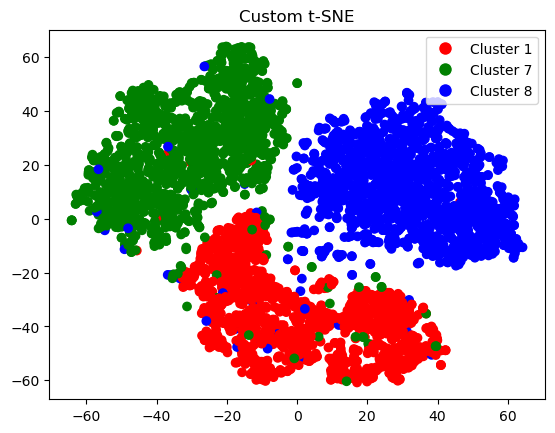

In [14]:
colors = {1: "red", 7: "green", 8: "blue"}
plt.scatter(custom_embedding_ad[:, 0], custom_embedding_ad[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
plt.legend(handles=legend_handles, loc='upper right')
plt.title("Custom t-SNE");

## Comparison

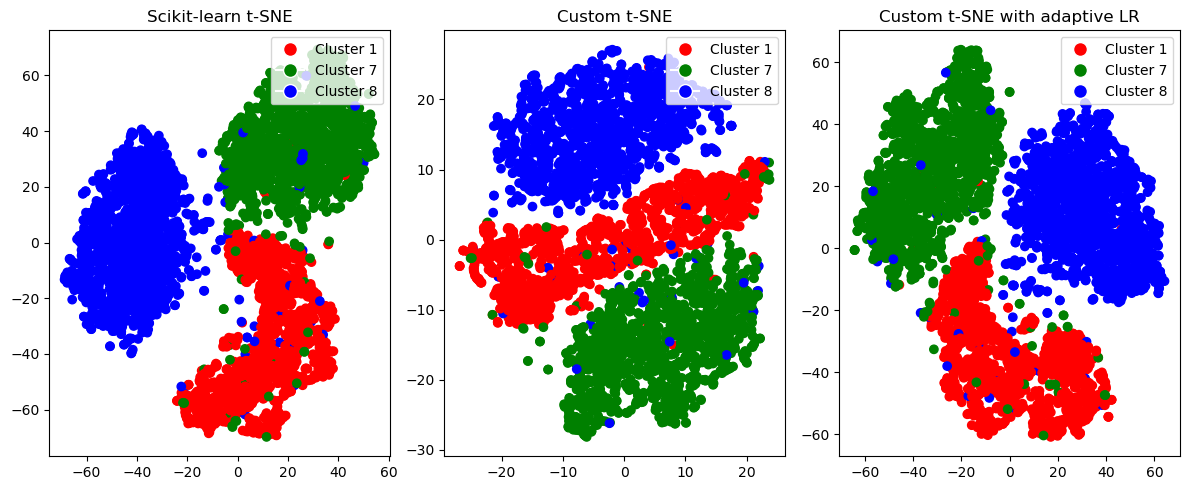

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.scatter(sk_embedding[:, 0], sk_embedding[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
ax1.legend(handles=legend_handles, loc='upper right')
ax1.set_title("Scikit-learn t-SNE")

ax2.scatter(custom_embedding[:, 0], custom_embedding[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
ax2.legend(handles=legend_handles, loc='upper right')
ax2.set_title("Custom t-SNE");

colors = {1: "red", 7: "green", 8: "blue"}
ax3.scatter(custom_embedding_ad[:, 0], custom_embedding_ad[:, 1], c=[colors[x[0]] for x in mnist_labels])
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'Cluster {label}') for label, color in colors.items()]
ax3.legend(handles=legend_handles, loc='upper right')
ax3.set_title("Custom t-SNE with adaptive LR")

plt.tight_layout()
plt.show()

In [16]:
sk_kl_div = mnist_tsne.kl_divergence_
custom_kl_div = mnist_custom_tsne.kl_divergence
custom_kl_div_ad = mnist_custom_tsne_ad.kl_divergence

In [17]:
print(f"Scikit-Learn -> KL = {sk_kl_div}")
print(f"Custom       -> KL = {custom_kl_div[-1]}")
print(f"Custom + DBD -> KL = {custom_kl_div_ad[-1]}")

Scikit-Learn -> KL = 1.500877857208252
Custom       -> KL = 1.7131773152000374
Custom + DBD -> KL = 1.4072360065662473


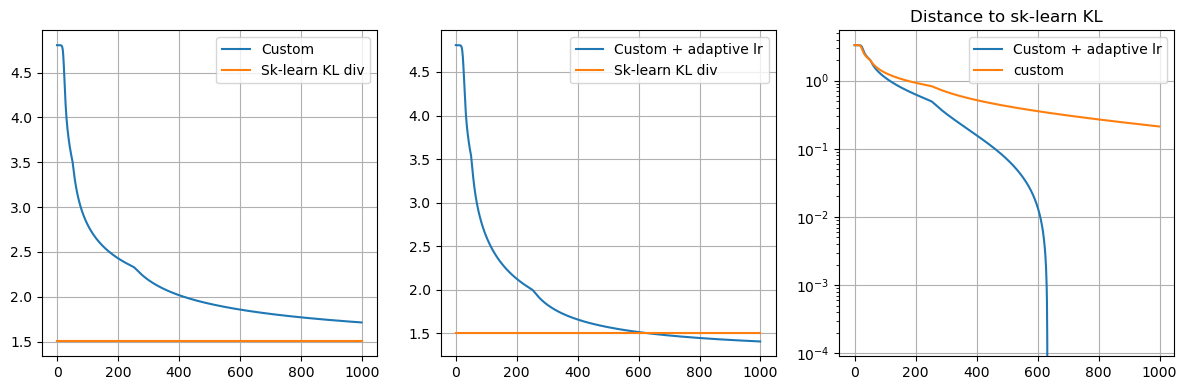

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(custom_kl_div, label="Custom")
ax1.plot([0, len(custom_kl_div)], [sk_kl_div, sk_kl_div], label="Sk-learn KL div")
ax1.grid('on')
ax1.legend()

ax2.plot(custom_kl_div_ad, label="Custom + adaptive lr")
ax2.plot([0, len(custom_kl_div)], [sk_kl_div, sk_kl_div], label="Sk-learn KL div")
ax2.grid('on')
ax2.legend()

ax3.plot(np.array(custom_kl_div_ad) - sk_kl_div, label="Custom + adaptive lr")
ax3.plot(np.array(custom_kl_div) - sk_kl_div, label='custom')
ax3.set_yscale("log")
ax3.legend()
ax3.grid('on')
ax3.set_title("Distance to sk-learn KL")

plt.tight_layout()
plt.show()